# Challenge 2: Kernel Ridge Regression and Kernel PCA
The challenge is to show why it is better (or not) to use kernelised methods in two toy data sets, and find out which kernel is the most suitable for each.    
There are two main tasks:
1. Ridge Regression vs Kernel Ridge Regression
2. PCA vs Kernel PCA

Tip: *for the whole challenge, you can use ```sklearn```.*

## 1. Ridge Regression
Using the training and test data sets created in the following cell, what you have to do is:
* Fit a linear Ridge Regression model;
* Fit a Kernel Ridge Regression model with a Gaussian kernel and one with a Polynomial kernel. Through a grid search, see how different values for gamma for the Gaussian, and different degrees and values for the regularisation term for the Polynomial, change the line that gets fitted by the model.   
Lastly, fit one last KRR with the best kernel and best parameters that you found (the ones that minimise the test error).

For each subtask, calculate the RMSE on the test data set and plot a visual representation of each fitted line, also when trying different values for the parameters.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error

# create training dataset
train_points = 20
eps = np.random.normal(0, 1, train_points)

X_train = np.linspace(-5, 5, train_points)
y_train = (X_train+4) * (X_train+1) * (np.cos(X_train)-1) * (X_train-3) + eps
X_train = X_train.reshape(-1, 1)
y_train = y_train.reshape(-1, 1)

# create testing data set
test_points = 1000

X_test = np.linspace(-5, 5, test_points)
y_test = (X_test+4) * (X_test+1) * (np.cos(X_test)-1) * (X_test-3)

X_test = X_test.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)

In [ ]:
#LINEAR RIDGE REGRESSION
ridge_model = Ridge()
ridge_model.fit(X_train, y_train)
y_pred = ridge_model.predict(X_test)
RMSE = np.sqrt(mean_squared_error(y_test, y_pred))
RMSE

26.865914158008323

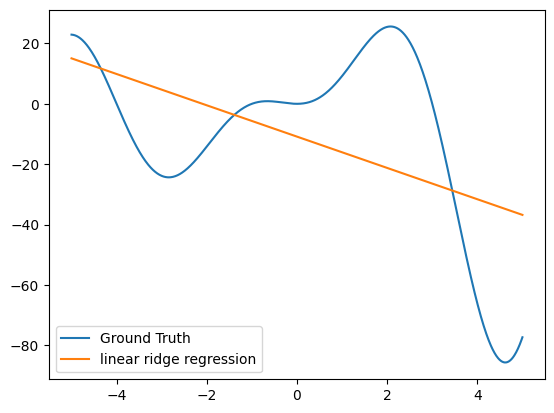

In [ ]:
#PLOT1
fig, ax = plt.subplots()
ax.plot(X_test, y_test, label='Ground Truth')
ax.plot(X_test, y_pred, label='linear ridge regression')
plt.legend()
fig.show()

In [ ]:
#KERNEL RIDGE REGRESSION WITH GAUSSIAN KERNEL
from sklearn.kernel_ridge import KernelRidge
#CHOOSING THE BEST GAMMA
RMSE_list = []
gammas=np.linspace(0.05,1,num=20)
for i in gammas:
  grk = KernelRidge(alpha=1.0, gamma=i, kernel='rbf')
  grk.fit(X_train, y_train)
  y_pred_grk = grk.predict(X_test)
  RMSE2 = np.sqrt(mean_squared_error(y_test, y_pred_grk))
  RMSE_list.append(RMSE2)
  print(i, RMSE2)

0.05 19.558633514130964
0.1 15.411640805140394
0.15 13.647180422778003
0.2 12.370939701126597
0.25 11.402987213376864
0.3 10.70278867919873
0.35 10.208900958554816
0.39999999999999997 9.863346233406386
0.44999999999999996 9.622472645149665
0.49999999999999994 9.455887863440243
0.5499999999999999 9.342803362005247
0.6 9.268904247800961
0.65 9.224178348007593
0.7 9.2014950027645
0.75 9.195683124592724
0.7999999999999999 9.20292807108775
0.85 9.220371200422088
0.9 9.245839449479915
0.95 9.277659505752993
1.0 9.314527906682622


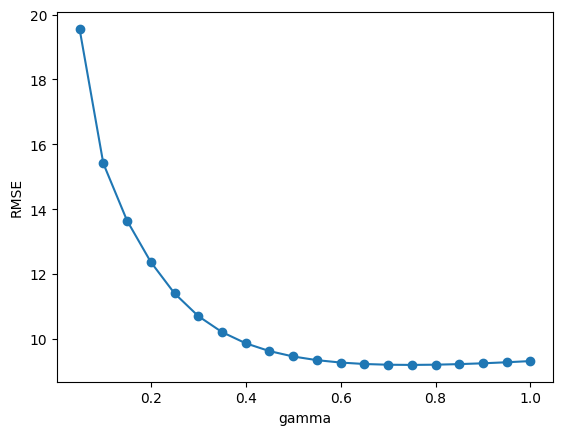

In [ ]:
plt.plot(gammas, RMSE_list, marker = 'o')
plt.xlabel('gamma')
plt.ylabel('RMSE')
plt.show()


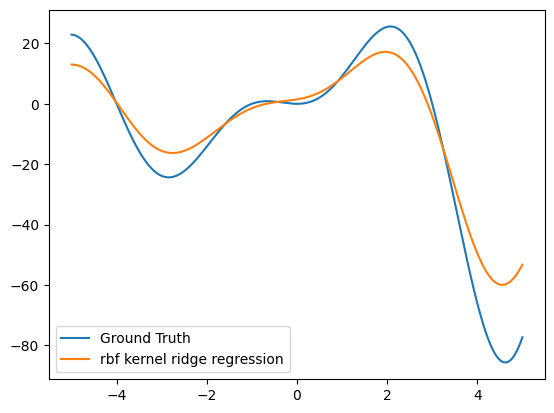

In [ ]:
#PLOT 2
grk = KernelRidge(alpha=1.0, gamma=0.75, kernel='rbf')
grk.fit(X_train, y_train)
y_pred_grk = grk.predict(X_test)
fig, ax = plt.subplots()
ax.plot(X_test, y_test, label='Ground Truth')
ax.plot(X_test, y_pred_grk, label='rbf kernel ridge regression')
plt.legend()
fig.show()

In [ ]:
#KERNEL RIDGE REGRESSION WITH POLYNOMIAL KERNEL
#CHOOSING THE BEST DEGREE
RMSE_list = []
degrees=[2,3,4,5,6,7,8,9,10,11,12,13,14,15,16]
for j in degrees:
    prk = KernelRidge(alpha=1.0, kernel='polynomial', gamma=None, degree=j)
    prk.fit(X_train, y_train)
    y_pred_prk = prk.predict(X_test)
    RMSE3 = np.sqrt(mean_squared_error(y_test, y_pred_prk))
    RMSE_list.append(RMSE3)
    print(j,RMSE3)

2 22.443313219090847
3 9.959108852914738
4 9.781488714571884
5 8.719559285469876
6 7.007515532956533
7 3.521994078073408
8 2.753291521930064
9 0.7431615190385886
10 0.7621161480503129
11 0.6471212727878795
12 0.6929325667873963
13 32.6371984990868
14 6.866211940164067
15 17.44796413422921
16 18.711365977108407


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_ridge.py:253: LinAlgWarning: Ill-conditioned matrix (rcond=6.93606e-17): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_ridge.py:253: LinAlgWarning: Ill-conditioned matrix (rcond=3.0369e-18): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_ridge.py:253: LinAlgWarning: Ill-conditioned matrix (rcond=7.3606e-21): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_ridge.py:255: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_ridge.py:255: UserWarning: Singular matrix in solving dual problem.

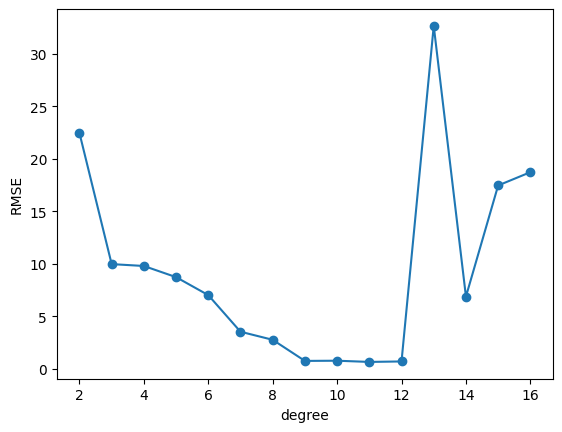

In [ ]:
plt.plot(degrees, RMSE_list, marker = 'o')
plt.xlabel('degree')
plt.ylabel('RMSE')
plt.show()

In [ ]:
#CHOOSING THE BEST ALPHA
RMSE_list = []
alphas=[1,2,3,4,5,6,7,8,9,10]
for a in alphas:
    prk = KernelRidge(alpha=a, kernel='polynomial', gamma=None, degree=11)
    prk.fit(X_train, y_train)
    y_pred_prk = prk.predict(X_test)
    RMSE3 = np.sqrt(mean_squared_error(y_test, y_pred_prk))
    RMSE_list.append(RMSE3)
    print(a,RMSE3)

1 0.6471212727878795
2 0.6279693191743626
3 0.6199239949925405
4 0.616783229306264
5 0.6163678563747279
6 0.6176589563999396
7 0.6199610245467332
8 0.6230244179452171
9 0.6267226151551687
10 0.6307689352224786


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_ridge.py:253: LinAlgWarning: Ill-conditioned matrix (rcond=6.93606e-17): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)


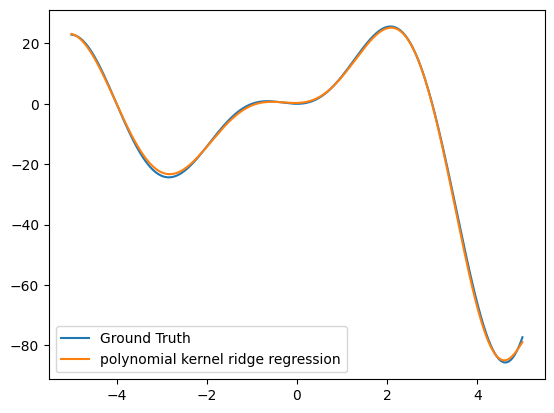

In [ ]:
#PLOT 3
prk = KernelRidge(alpha=9, kernel='polynomial', gamma=None, degree=11)
prk.fit(X_train, y_train)
y_pred_prk = prk.predict(X_test)
fig, ax = plt.subplots()
ax.plot(X_test, y_test, label='Ground Truth')
ax.plot(X_test, y_pred_prk, label='polynomial kernel ridge regression')
plt.legend()
fig.show()

## 2. PCA
Using the training and test data sets created in the following cell, what you have to do is:
* Fit a PCA model;
* Fit a Kernel PCA model with a kernel of your choice.

For each subtask, plot a visual representation of the projections and verify the accuracy of that kernel on the test data set using SVM.

In [ ]:
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split

X, y = make_circles(n_samples=1000, noise=0.15, factor=0.2, random_state = 0)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, random_state=0)

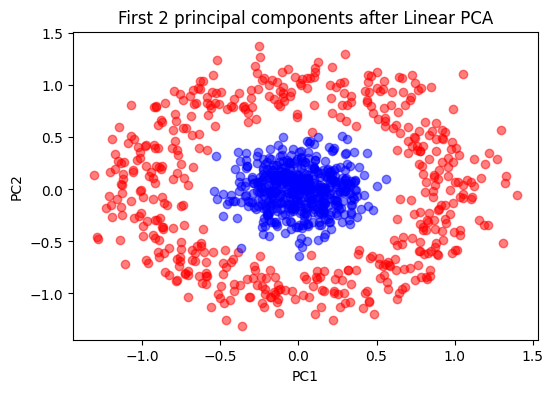

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_spca = pca.fit_transform(X)

plt.figure(figsize=(6,4))
plt.scatter(X_spca[y==0, 0], X_spca[y==0, 1], color='red', alpha=0.5)
plt.scatter(X_spca[y==1, 0], X_spca[y==1, 1], color='blue', alpha=0.5)

plt.title('First 2 principal components after Linear PCA')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

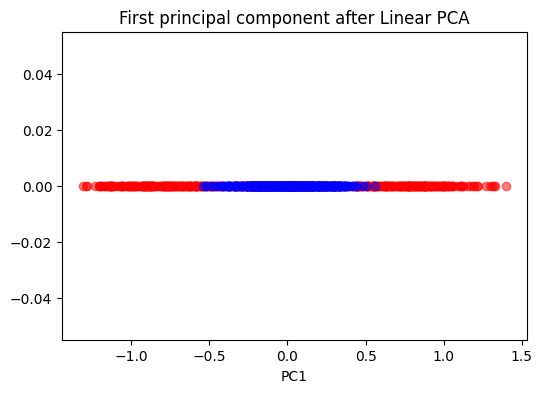

In [ ]:
spca = PCA(n_components=1)
X_sspca = spca.fit_transform(X)
plt.figure(figsize=(6,4))
X_sspca
plt.scatter(X_sspca[y==0, 0], np.zeros((500,1)), color='red', alpha=0.5)
plt.scatter(X_sspca[y==1, 0], np.zeros((500,1)), color='blue', alpha=0.5)
plt.title('First principal component after Linear PCA')
plt.xlabel('PC1')

plt.show()


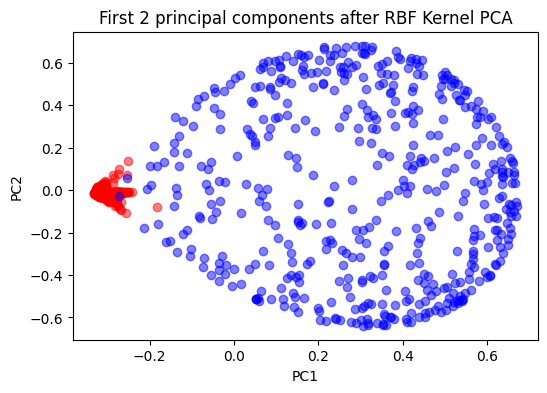

In [ ]:
from sklearn.decomposition import KernelPCA
kpca = KernelPCA(n_components=2, kernel='rbf', gamma=11, alpha=9, fit_inverse_transform=True)
X_kpca = kpca.fit_transform(X)
X_kpca.shape
plt.figure(figsize=(6,4))
plt.scatter(X_kpca[y==0, 0], X_kpca[y==0, 1], color='red', alpha=0.5)
plt.scatter(X_kpca[y==1, 0], X_kpca[y==1, 1], color='blue', alpha=0.5)

plt.title('First 2 principal components after RBF Kernel PCA')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

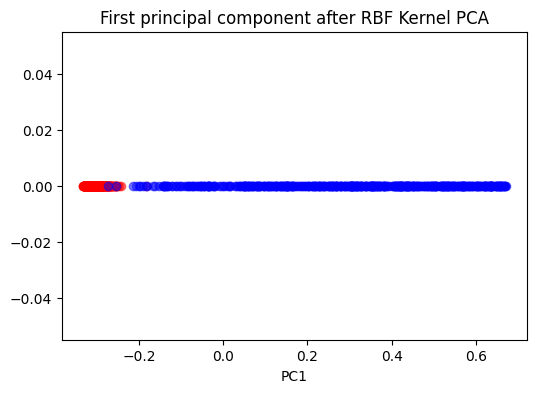

In [ ]:
plt.figure(figsize=(6,4))
plt.scatter(X_kpca[y==0, 0], np.zeros((500,1)), color='red', alpha=0.5)
plt.scatter(X_kpca[y==1, 0], np.zeros((500,1)), color='blue', alpha=0.5)

plt.title('First principal component after RBF Kernel PCA')
plt.xlabel('PC1')

plt.show()

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

svc = SVC(kernel='rbf')
svc.fit(X_train, y_train)
y_pred_sk = svc.predict(X_test)
accuracy_score(y_test, y_pred_sk)

0.996

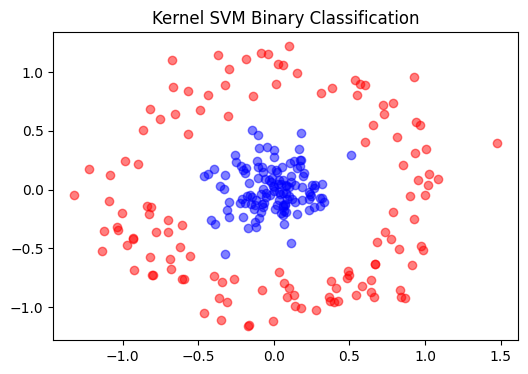

In [ ]:
plt.figure(figsize=(6,4))

plt.scatter(X_test[y_pred_sk==0, 0], X_test[y_pred_sk==0, 1], color='red', alpha=0.5)
plt.scatter(X_test[y_pred_sk==1, 0], X_test[y_pred_sk==1, 1], color='blue', alpha=0.5)

plt.title('Kernel SVM Binary Classification')

plt.show()

## 3. PCA pt.2
Repeat the last point of the previous task with a dataset made with ```sklearn.datasets.make_classification()```. Find the best kernel, and comment on your discoveries in the report. What differences do you see with the previous data set?

In [ ]:
from sklearn.datasets import make_classification
X1, Y1 = make_classification(n_samples=1000, n_features=2, n_redundant=0, n_informative=2, n_classes=2)
Y1.shape
X1.shape

(1000, 2)

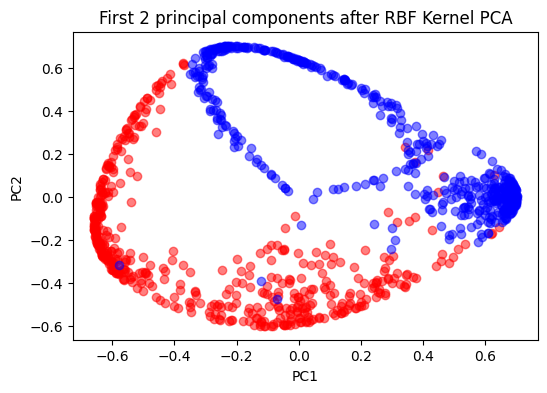

In [ ]:
kpca2 = KernelPCA(n_components=2, kernel='rbf')
X_kpca2 = kpca2.fit_transform(X1)
plt.figure(figsize=(6,4))
plt.scatter(X_kpca2[Y1==0, 0], X_kpca2[Y1==0, 1], color='red', alpha=0.5)
plt.scatter(X_kpca2[Y1==1, 0], X_kpca2[Y1==1, 1], color='blue', alpha=0.5)

plt.title('First 2 principal components after RBF Kernel PCA')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

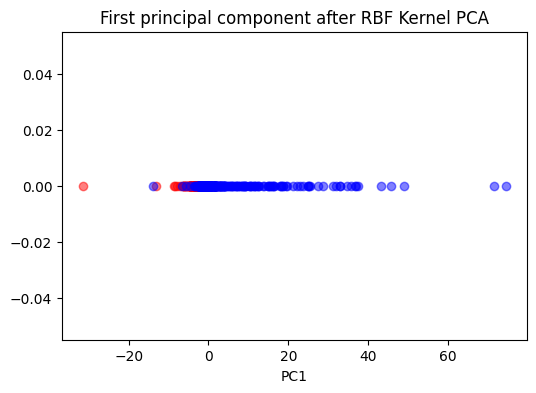

In [ ]:
plt.figure(figsize=(6,4))
shape1=(X_kpca2[Y1==0, 0].shape)
shape2=(X_kpca2[Y1==1, 0].shape)

plt.scatter(X_kpca2[Y1==0, 0], np.zeros(shape1), color='red', alpha=0.5)
plt.scatter(X_kpca2[Y1==1, 0], np.zeros(shape2), color='blue', alpha=0.5)


plt.title('First principal component after RBF Kernel PCA')
plt.xlabel('PC1')

plt.show()

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

kernels = ['linear', 'rbf', 'poly', 'sigmoid']
best_accuracy=0

for k in kernels:
  svc = SVC(kernel=k)
  svc.fit(X1, Y1)
  y_pred_sk = svc.predict(X_test)
  accuracy = accuracy_score(y_test, y_pred_sk)
  if accuracy > best_accuracy:
    best_accuracy = accuracy
    best_kernel = k
print(f"\nBest kernel for this dataset is {best_kernel} with accuracy {best_accuracy}")


Best kernel for this dataset is rbf with accuracy 0.728


In [ ]:
#USING POLYNOMIAL KERNEL
svc = SVC(kernel='poly')
svc.fit(X1, Y1)
y_pred_sk = svc.predict(X_test)

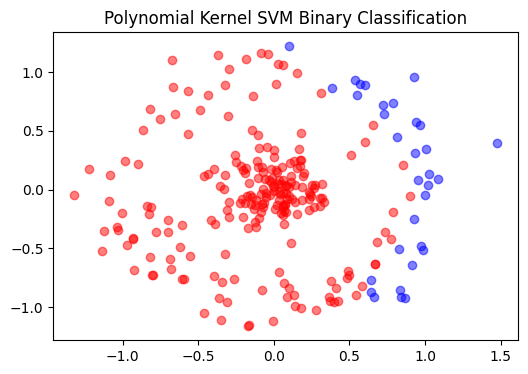

In [ ]:
plt.figure(figsize=(6,4))

plt.scatter(X_test[y_pred_sk==0, 0], X_test[y_pred_sk==0, 1], color='red', alpha=0.5)
plt.scatter(X_test[y_pred_sk==1, 0], X_test[y_pred_sk==1, 1], color='blue', alpha=0.5)

plt.title('Polynomial Kernel SVM Binary Classification')

plt.show()